In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [3]:
# Load the datasets
train_df = pd.read_csv(r"C:\Users\hp\Downloads\XGBM & LGBM\XGBM & LGBM\Titanic_train.csv")
test_df = pd.read_csv(r"C:\Users\hp\Downloads\XGBM & LGBM\XGBM & LGBM\Titanic_test.csv")

In [4]:
# Combine train and test data for consistent preprocessing
test_df['Survived'] = np.nan  # Add Survived column to test set
combined = pd.concat([train_df, test_df], sort=False)

In [5]:
# Exploratory Data Analysis (EDA)
# Check for missing values
missing_values = combined.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [7]:
combined.shape

(1309, 12)

In [ ]:
# Data Preprocessing
# Impute missing values
combined['Age'].fillna(combined['Age'].median(), inplace=True)
combined['Survived'].fillna(combined['Survived'].median(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_15812\1789385555.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined['Age'].fillna(combined['Age'].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_15812\1789385555.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [11]:
combined.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
# Drop 'Cabin' due to high number of missing values
combined.drop('Cabin', axis=1, inplace=True)

In [13]:
combined.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [15]:
# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# Create a dictionary to store the mapping
mapping_dict = {}
# Apply label encoding to categorical columns
categorical_cols = [col for col in combined.columns if combined[col].dtype == 'object']
for col in categorical_cols:
    # Apply the encoder and store the mapping
    combined[col] = encoder.fit_transform(combined[col])
    mapping_dict[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

In [16]:
combined

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,155,1,22.0,1,0,720,7.2500,2
1,2,1.0,1,286,0,38.0,1,0,816,71.2833,0
2,3,1.0,3,523,0,26.0,0,0,914,7.9250,2
3,4,1.0,1,422,0,35.0,1,0,65,53.1000,2
4,5,0.0,3,22,1,35.0,0,0,649,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0.0,3,1126,1,28.0,0,0,711,8.0500,2
414,1306,0.0,1,891,0,39.0,0,0,834,108.9000,0
415,1307,0.0,3,1046,1,38.5,0,0,872,7.2500,2
416,1308,0.0,3,1227,1,28.0,0,0,579,8.0500,2


In [17]:
# Drop unnecessary columns
combined.drop(['Ticket', 'Embarked'], axis=1, inplace=True)

In [18]:
# Split combined data back into train and test sets
train_processed = combined[:len(train_df)]
test_processed = combined[len(train_df):]

In [19]:
# Separate features and target variable from training data
X = train_processed.drop('Survived', axis=1)
y = train_processed['Survived'].astype(int)

In [20]:
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Define evaluation function
def evaluate_model(model, X_valid, y_valid):
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred))
    print("Classification Report:\n", classification_report(y_valid, y_pred))

In [23]:
! pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 799.2 kB/s eta 0:00:02
   ---------------------------- ----------- 1.0/1.5 MB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import lightgbm as lgb
import xgboost as xgb

# LightGBM Classifier
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
print("LightGBM Performance:")
evaluate_model(lgb_model, X_valid, y_valid)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [25]:
# XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
print("XGBoost Performance:")
evaluate_model(xgb_model, X_valid, y_valid)


c:\Users\hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:17:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Performance:
Accuracy: 0.8324022346368715
Precision: 0.84375
Recall: 0.7297297297297297
F1 Score: 0.782608695652174
Confusion Matrix:
 [[95 10]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.84      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



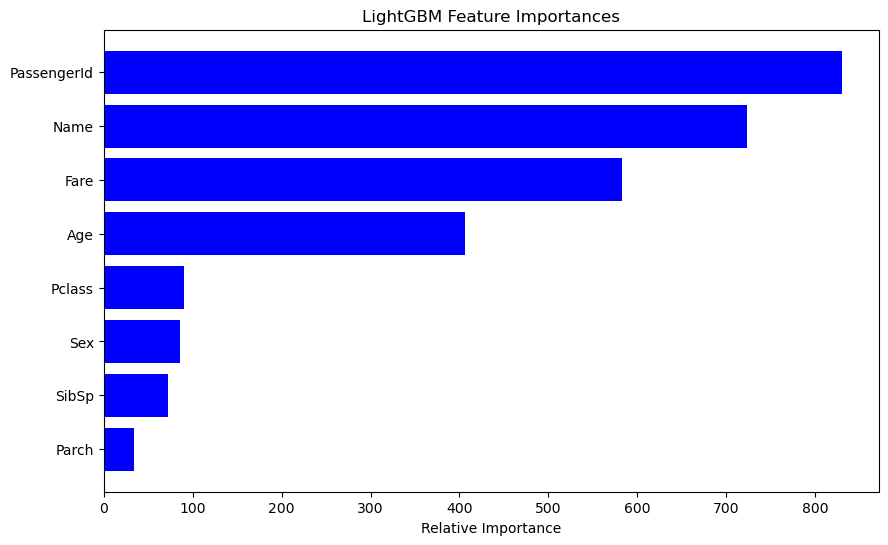

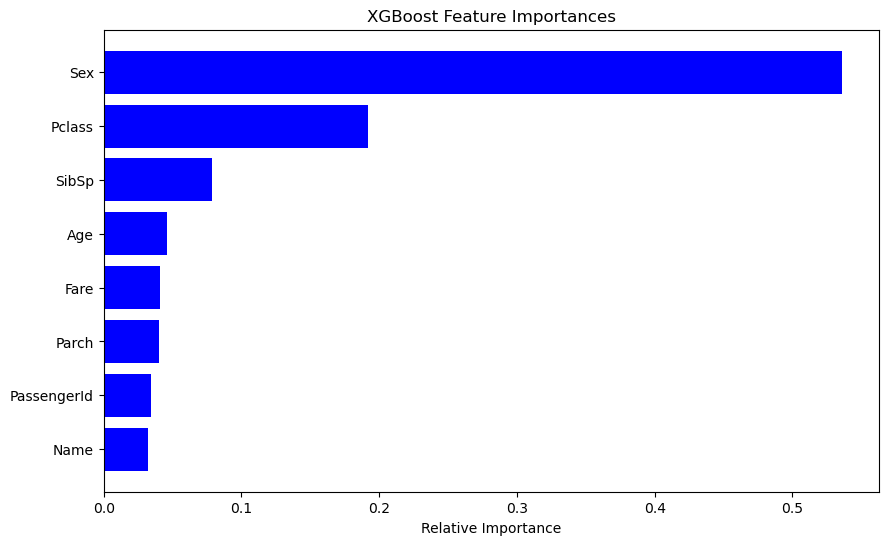

In [26]:
# Feature Importance Visualization
def plot_feature_importance(model, model_name):
    importance = model.feature_importances_
    features = X.columns
    indices = np.argsort(importance)

    plt.figure(figsize=(10, 6))
    plt.title(f'{model_name} Feature Importances')
    plt.barh(range(len(indices)), importance[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

plot_feature_importance(lgb_model, 'LightGBM')
plot_feature_importance(xgb_model, 'XGBoost')